In [1]:
import pandas as p
data = p.read_csv('train.csv')
data.head()

,date,Temperature,Humidity,Light,CO2,HumidityRatio,Occupancy
0,2/4/2015 18:07,23.000,27.200,0.0,681.5,0.004728,0
1,2/4/2015 18:16,22.790,27.445,0.0,689.0,0.004710,0
2,2/4/2015 19:05,22.245,27.290,0.0,602.5,0.004530,0
3,2/4/2015 19:06,22.200,27.290,0.0,598.0,0.004517,0
4,2/4/2015 19:12,22.200,27.290,0.0,593.5,0.004517,0


In [2]:
X = data.drop('date',axis=1)
X = X.drop('Occupancy', axis=1)
Y = data['Occupancy']

In [3]:
maxdepth = [2, 5, 10, 15, 20]
k = [1, 2, 3, 4, 5, 10,15]
c = [0.001, 0.01, 0.1, 0.5, 1]

In [4]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
accuracy = []
for i in maxdepth:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())


In [5]:
accuracy

[0.96995283018867917,
 0.9812421383647798,
 0.99124213836477981,
 0.98998427672955969,
 0.9812421383647798]

In [6]:
import pandas as p
data = p.read_csv('test.csv')
data.head()

X_test = data.drop('date',axis=1)
X_test = X_test.drop('Occupancy', axis=1)
Y_test = data['Occupancy']

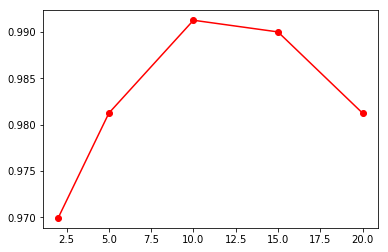

In [7]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.plot(maxdepth,accuracy,'ro-')

In [8]:
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
accuracy = []
for i in k:
    clf = KNeighborsClassifier(n_neighbors=i)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())

In [9]:
accuracy

[0.98120283018867926,
 0.97745283018867934,
 0.98495283018867918,
 0.9837028301886791,
 0.98243710691823893,
 0.97740566037735854,
 0.96482704402515718]

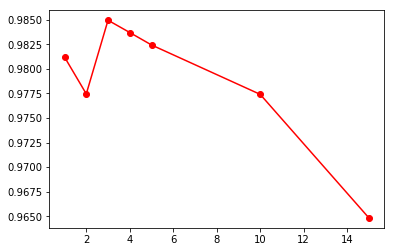

In [10]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.plot(k,accuracy,'ro-')

In [11]:
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
accuracy = []
for i in c:
    clf = LogisticRegression(C=i)
    scores = cross_val_score(clf, X, Y, cv=5)
    accuracy.append(scores.mean())
    

In [12]:
accuracy

[0.96734276729559754,
 0.98746855345911955,
 0.99250000000000005,
 0.99250000000000005,
 0.99250000000000005]

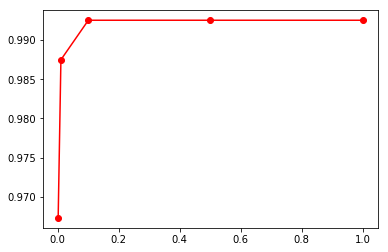

In [13]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt 
plt.plot(c,accuracy,'ro-')

In [14]:
clf = tree.DecisionTreeClassifier(max_depth=5.0)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_Decision = accuracy_score(Y_test,Y_pred)

accuracy_test_Decision

0.98720392050095285

In [15]:
clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_Knearest = accuracy_score(Y_test,Y_pred)

accuracy_test_Knearest

0.98842907704873395

In [16]:
clf = LogisticRegression(C=1.0)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_logistic = accuracy_score(Y_test,Y_pred)

accuracy_test_logistic

0.98761230601687988

In [17]:
accuracy_test_Decision=[]
accuracy_score_list=[]
for i in maxdepth:
    clf = tree.DecisionTreeClassifier(max_depth=i)
    clf = clf.fit(X, Y)
    Y_pred_train = clf.predict(X)
    Y_pred = clf.predict(X_test)
    accuracy_score_list.append(accuracy_score(Y,Y_pred_train))
    accuracy_test_Decision.append(accuracy_score(Y_test,Y_pred))

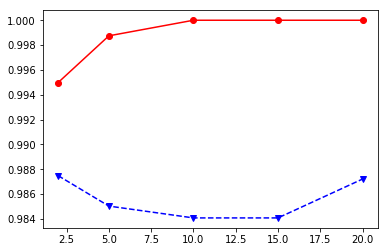

In [18]:
import matplotlib.pyplot as plt 
plt.plot(maxdepth,accuracy_score_list,'ro-',maxdepth,accuracy_test_Decision,'bv--')

In [19]:
accuracy_test_Knearest=[]
accuracy_score_list=[]
for i in maxdepth:
    clf = KNeighborsClassifier(n_neighbors=i)
    clf = clf.fit(X, Y)
    Y_pred_train = clf.predict(X)
    Y_pred = clf.predict(X_test)
    accuracy_score_list.append(accuracy_score(Y,Y_pred_train))
    accuracy_test_Knearest.append(accuracy_score(Y_test,Y_pred))

0.984753607405
0.988429077049
0.987612306017


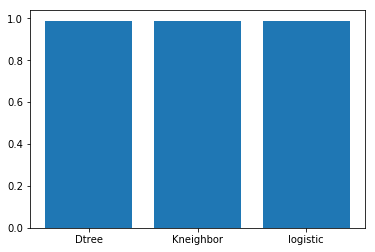

In [37]:
from sklearn import linear_model
from sklearn.svm import SVC

Desicion_acc_list = []
KNeighbors_acc_list=[]
logistic_acc_list = []

clf = tree.DecisionTreeClassifier(max_depth=5.0)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_Decision = accuracy_score(Y_test,Y_pred)

clf = KNeighborsClassifier(n_neighbors=3)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_Knearest = accuracy_score(Y_test,Y_pred)

    
clf = LogisticRegression(C=1.0)
clf = clf.fit(X, Y)
Y_pred = clf.predict(X_test)
accuracy_test_logistic = accuracy_score(Y_test,Y_pred)

methods = ['Dtree','Kneighbor','logistic']
acc = [accuracy_test_Decision,accuracy_test_Knearest,accuracy_test_logistic]
plt.bar([1, 2, 3], acc)
plt.xticks([1,2,3], methods)

# ystick = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.85,0.97,0.98,0.9]

print accuracy_test_Decision

print accuracy_test_Knearest

print accuracy_test_logistic




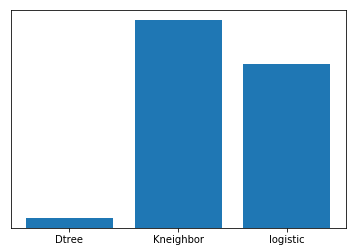

In [38]:
#######################################
# Show differency to re-scale the y-axis by yscale('log')
#######################################
methods = ['Dtree','Kneighbor','logistic']
acc = [accuracy_test_Decision,accuracy_test_Knearest,accuracy_test_logistic]
plt.bar([1, 2, 3], acc)
plt.xticks([1,2,3], methods)
plt.yscale("log")